In [ ]:
from google.colab import drive

# Mount Google Drive to '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_file_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification.zip'

# Replace 'extracted_folder' with the name you want for the extracted folder
extracted_folder_path = '/content/drive/MyDrive/Opencode'

# !unzip {zip_file_path} -d {extracted_folder_path}

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/Opencode/Medical-Image-Classification.zip' has been successfully extracted to '/content/drive/MyDrive/Opencode'.


In [ ]:
zip_file_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData.zip'

# Replace 'extracted_folder' with the name you want for the extracted folder
extracted_folder_path = '/content/drive/MyDrive/Opencode/Medical-Image-Classification'

# !unzip {zip_file_path} -d {extracted_folder_path}

print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")

File '/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData.zip' has been successfully extracted to '/content/drive/MyDrive/Opencode/Medical-Image-Classification'.


In [ ]:
#Import any library here only.

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot  as plt
import matplotlib.image as img
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import random
from PIL import Image
import imutils
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

In [ ]:
normal_images_path = os.listdir("/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/NORMAL")
print(len(normal_images_path))
normal_images_path[35]

234


'IM-0111-0001.jpeg'

In [ ]:
infected_images_path = os.listdir("/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/INFECTED")
print(len(infected_images_path))
infected_images_path[30]

390


'person113_bacteria_540.jpeg'

In [ ]:
def load_data(path,list):
  label=[]
  images=[]
  for file in list:
    file_path =  os.path.join(path,file)
    img = cv2.imread(file_path)
    img = cv2.resize(img,(100,100))
    if("bacteria" in file ):
      images.append(img)
      label.append("1")
    elif("virus" in file):
      images.append(img)
      label.append("1")
    else:
      images.append(img)
      label.append("0")


  return images , label


In [ ]:
normal_fol_path = "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/NORMAL"
infected_fol_path = "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData/INFECTED"

In [ ]:
normal_images , label_1 = load_data(normal_fol_path,normal_images_path)
print(len(label_1))

infected_images , label_2 = load_data(infected_fol_path,infected_images_path)
print(len(label_2))

234
390


In [ ]:
normal_images = np.asarray(normal_images)
print(normal_images.shape)
infected_images =np.asarray(infected_images)
print(infected_images.shape)

(234, 100, 100, 3)
(390, 100, 100, 3)


In [ ]:
Images = np.concatenate((normal_images, infected_images), axis=0)

print(Images.shape)

Labels = np.concatenate((label_1,label_2),axis=0)

print(Labels.shape)

(624, 100, 100, 3)
(624,)


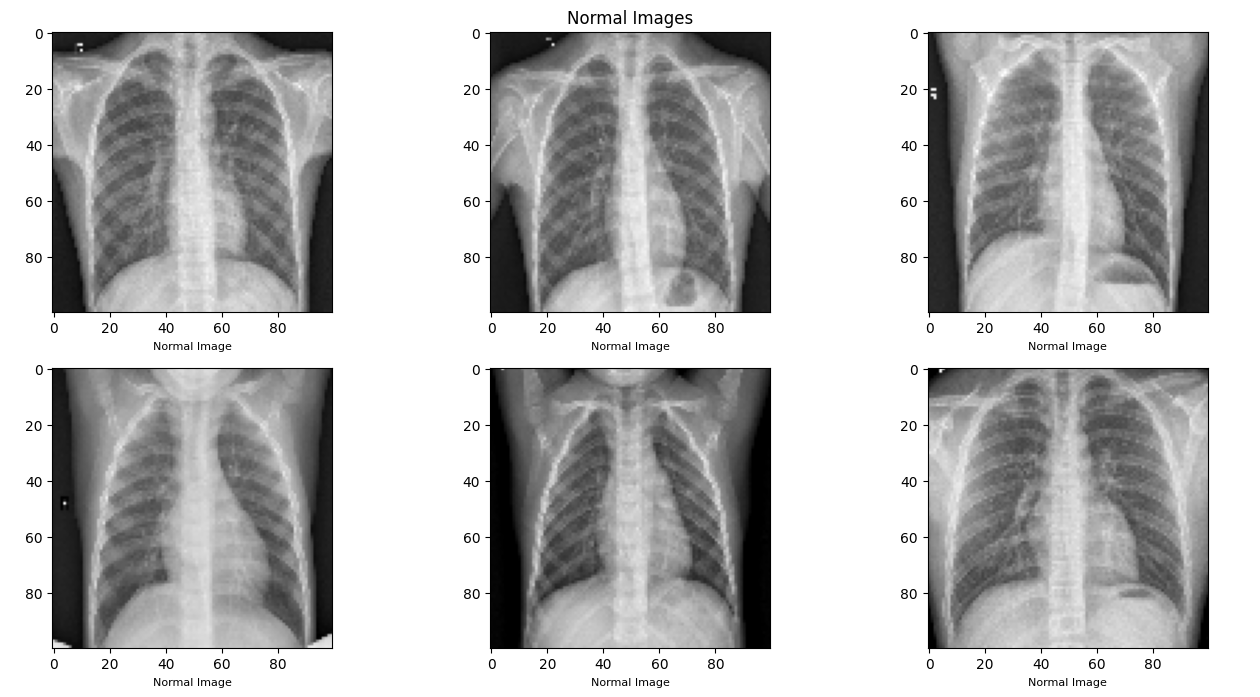

In [ ]:
ct=1
fig = plt.figure(figsize =(16,8))
plt.title("Normal Images")
plt.axis("off")
plt.tick_params(left = False)
row = 2
col = 3
for i in  normal_images:
  if(1<=ct<=6):
    ct=ct+1
    fig.add_subplot(row,col,ct-1)
    plt.imshow(i)
    plt.xlabel("Normal Image",fontsize="8")


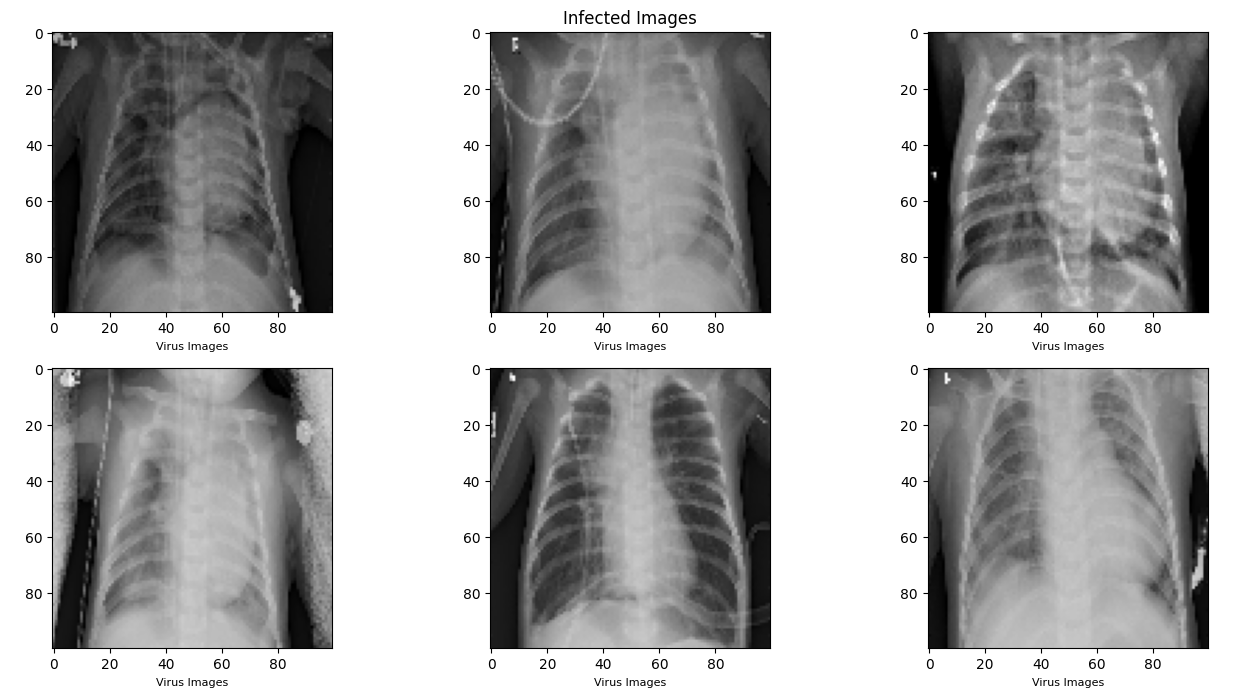

In [ ]:
ct=1
fig = plt.figure(figsize =(16,8))
plt.title("Infected Images")
plt.axis("off")
plt.tick_params(left = False,right=False)
row = 2
col = 3
for i in  infected_images:
  if(1<=ct<=6):
    ct=ct+1
    fig.add_subplot(row,col,ct-1)
    plt.imshow(i)
    if(label_2[ct]==1):
      plt.xlabel("Bacterial Images",fontsize="8")
    else:
      plt.xlabel("Virus Images",fontsize="8")

## <font color='orange'>Task #2</font>

Data Augmentation

Here I have attached an resource if you find difficuties in dealing with imbalanced data: [Click here](https://www.geeksforgeeks.org/imbalanced-learn-module-in-python/)

Image augmentation and Pre-Processing:
*  [Resource 1](https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/)
*  [Resource 2](https://www.analyticsvidhya.com/blog/2023/03/getting-started-with-image-processing-using-opencv/)

**Ofcourse you may use other techniques of your choice :)**

** Keep note that pre-proceesing and augmentation play crucial role in building good models

In [ ]:
#Deal with unbalanced data

'''
    Now condider only two categories "Normal" and "Infected".
'''


'\n    Now condider only two categories "Normal" and "Infected".\n'

In [ ]:
# Pre-process images here.


In [ ]:
#as x-ray images do not show color so we can convert the images to gray scale
#this would reduce computation later on while training the model

In [ ]:
def rgb_to_gray(image):
  # image = cv2.imread(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return image


In [ ]:
Images = [rgb_to_gray(i) for i in Images]

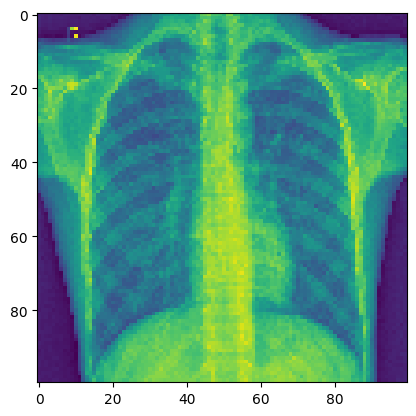

In [ ]:
plt.imshow(Images[0])

In [ ]:
#we have converted the Images to grayScale ,now we will increase the Conttrast in images
#using histEqualisation

In [ ]:
#before the let us see its effects on Images and plot the Histogram

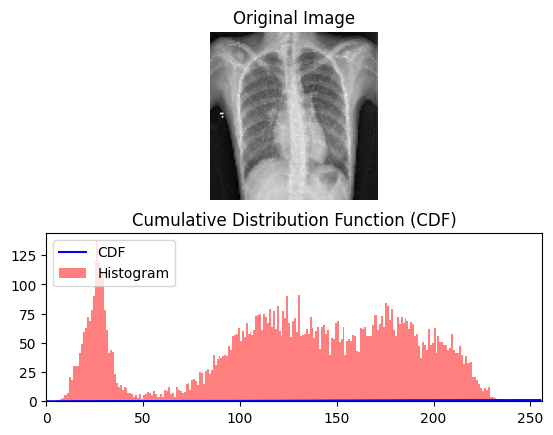

In [ ]:
hist, bins = np.histogram(Images[40].flatten(), 256, [0, 256])
image = Images[40]
# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to be between 0 and 1
cdf_normalized = cdf / cdf.max()

# Plot the original image
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title('Original Image')

# Plot the CDF
plt.subplot(2, 1, 2)
plt.plot(cdf_normalized, color='b')
plt.hist(image.flatten(), 256, [0, 256], color='r', alpha=0.5)
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Cumulative Distribution Function (CDF)')

plt.show()

In [ ]:
#comparing the original and histequalised images

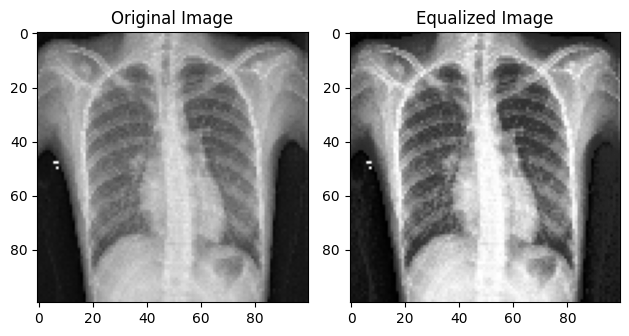

In [ ]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Plot the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.tight_layout()
plt.show()

In [ ]:
#ploting the histequalised images' cdf

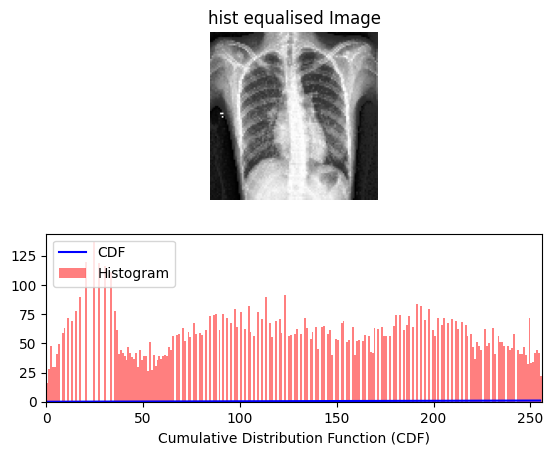

In [ ]:
hist, bins = np.histogram( equalized_image.flatten(), 256, [0, 256])
image = equalized_image
# Calculate the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF to be between 0 and 1
cdf_normalized = cdf / cdf.max()

# Plot the original image
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('hist equalised Image')



# Plot the CDF
plt.subplot(2, 1, 2)
plt.plot(cdf_normalized, color='b')
plt.hist(image.flatten(), 256, [0, 256], color='r', alpha=0.5)
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.xlabel('Cumulative Distribution Function (CDF)')

plt.show()

In [ ]:
#now hist Equalising all images

Images = [cv2.equalizeHist(img) for img in Images]

In [ ]:
#we will also normalise the images

In [ ]:
Images = [img/255.0 for img in Images]

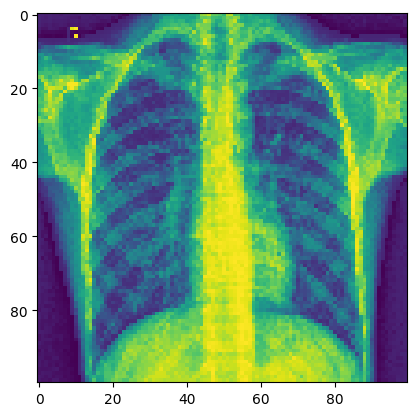

In [ ]:
plt.imshow(Images[0])

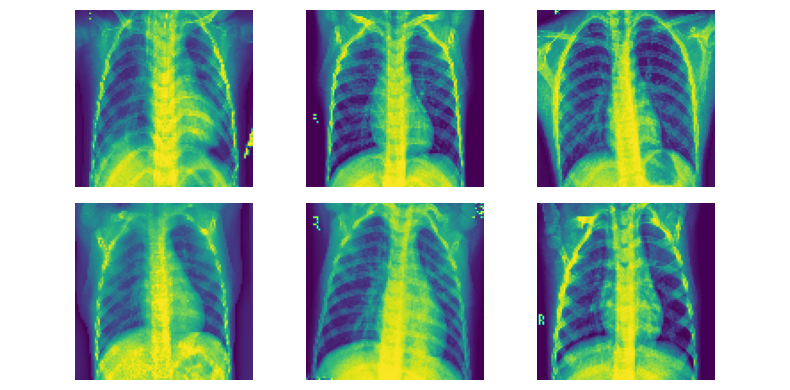

In [ ]:
# Plot 5 pre-processed image
i = {134,423,45,241,37,180}
fig = plt.figure(figsize =(8,4))
# plt.title("Pre-processed Images",fontsize=18)
plt.axis("off")
ct=1

for i in i:
  fig.add_subplot(2,3,ct)
  plt.imshow(Images[i])
  plt.axis("off")
  plt.tight_layout()
  ct=ct+1

In [ ]:
# Split images into train, validation and test.

X_train, X_temp, y_train, y_temp = train_test_split(Images,Labels, test_size=0.2, random_state=42)

# Split the temporary set into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
temp = pd.DataFrame(y_train)
temp[0].value_counts()

1    317
0    182
Name: 0, dtype: int64

In [ ]:
y_train.shape

(499,)

In [ ]:
# Do required image augmentation on train data here.
class_to_augment = 0
indices_to_augment=[]
for i in range(len(y_train)):
  if(y_train[i]=='0'):
    indices_to_augment.append(i)
# indices_to_augment

In [ ]:
#making a function that will return the augmented images

def augment_image(image):
    # Randomly adjust brightness
    beta = np.random.uniform(-10, 10)
    augmented_image = cv2.add(image, beta)

    # Add random Gaussian noise
    noise = np.random.normal(0, 0.015, augmented_image.shape )
    augmented_image = cv2.add(augmented_image, noise)

    # filpping image to random angle
    random_value = random.randint(0, 180)

    augmented_image = imutils.rotate(augmented_image, angle=random_value)

    # print("augmented and sent")
    return augmented_image

Text(0.5, 1.0, 'real')

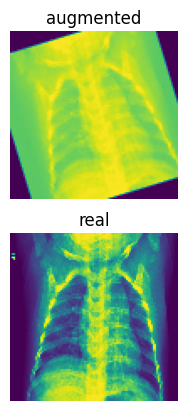

In [ ]:
img = augment_image(X_train[40])
plt.subplot(2,1,1)
plt.title("augmented")
plt.axis("off")
plt.imshow(img)

plt.subplot(2,1,2)
plt.imshow(X_train[40])
plt.axis("off")
plt.title("real")

In [ ]:
#calling the function here to augment around 120 images of class 0

aug_img=[]
ct=0
for i in indices_to_augment:
  if(ct<120):
    img = augment_image(X_train[i])
    aug_img.append(img)
    ct+=1

len(aug_img)

120

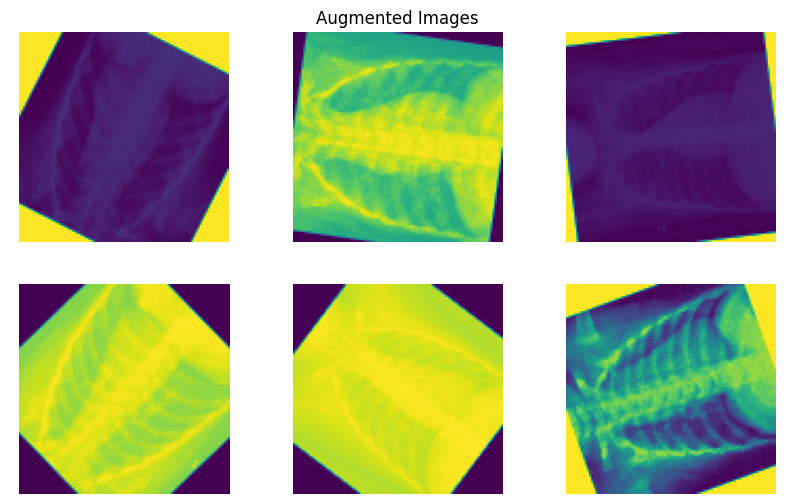

In [ ]:
# Plot 5 augmented train images

fig = plt.figure(figsize =(10,6))
plt.title("Augmented Images")
plt.axis("off")
row=2
col=3

for i in range(6):
  fig.add_subplot(row,col,i+1)
  plt.imshow(aug_img[i])
  plt.axis("off")


In [ ]:
a=temp.value_counts()
norm_img_num=a['0'] + len(aug_img)
inf_img_num=a['1']
print(f"instances of normal images {norm_img_num}")
print(f"instances of infected images {inf_img_num}")

instances of normal images 302
instances of infected images 317


In [ ]:
#now we have augmented class 1 images making the data balanced as well as increasing the size of dataset
#later on we will append these augmented images to X_train and labels to y_train and train the model

## <font color='orange'>Task #3</font>

Build and Training model

Aim to increase accuracy and AUC score

Note: Accuracy of your model also depend on how you have <font color='orange'>pre-processed</font> your data along with model architecture. Hence results of your CNN is highly dependent on Task #2
---



In [ ]:
aug_img = np.asarray(aug_img)

In [ ]:
type(aug_img)

numpy.ndarray

In [ ]:
aug_img.shape

(120, 100, 100)

In [ ]:
X_train = np.concatenate((X_train, aug_img), axis=0)

In [ ]:
X_train.shape

(619, 100, 100)

In [ ]:
new_labels = []
for i in range(120):
  new_labels.append(0)

In [ ]:
y_train = np.concatenate((y_train,new_labels),axis=0)

In [ ]:
y_train.shape

(619,)

In [ ]:
y_train = [int(i) for i in y_train]

In [ ]:
y_val = [int(i) for i in y_val]

In [ ]:
y_test = [int(i)  for i in y_test]


In [ ]:
X_val = np.asarray(X_val)
X_test = np.asarray(X_test)

In [ ]:
y_train = np.asarray(y_train)
# y_train=y_train.T
y_test = np.asarray(y_test)
# y_test=y_test.T

y_val = np.asarray(y_val)
# y_val=y_val.T


In [ ]:
len(y_val)

63

In [ ]:
temp=pd.DataFrame(y_val)
temp.value_counts()

1    40
0    23
dtype: int64

In [ ]:
len(X_val)

63

In [ ]:
len(X_train)

619

In [ ]:
len(y_train)

619

In [ ]:
X_train = np.asarray(X_train)

In [ ]:
X_train.shape

(619, 100, 100)

This is <font color='red'>binary</font> classification task. Classifying images into <font color='yellow'>normal and infected</font>

In [ ]:
#Create a CNN.
#Use accuracy and ROC-AUC matices.


**building the model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#  the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','AUC'])

#  model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 28224)            

In [ ]:
#Run model here.

In [ ]:
history  = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val,y_val))

Epoch 1/15
10/10 [==============================] - 8s 676ms/step - loss: 0.6381 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.6972 - val_accuracy: 0.6349 - val_auc: 0.5000
Epoch 2/15
10/10 [==============================] - 5s 541ms/step - loss: 0.5550 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.6372 - val_accuracy: 0.6349 - val_auc: 0.5000
Epoch 3/15
10/10 [==============================] - 6s 654ms/step - loss: 0.5093 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.4847 - val_accuracy: 0.6349 - val_auc: 0.5000
Epoch 4/15
10/10 [==============================] - 6s 572ms/step - loss: 0.4543 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.4056 - val_accuracy: 0.6349 - val_auc: 0.5000
Epoch 5/15
10/10 [==============================] - 7s 664ms/step - loss: 0.3794 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.2813 - val_accuracy: 0.6349 - val_auc: 0.5000
Epoch 6/15
10/10 [==============================] - 6s 582ms/step - loss: 0.3334 - accuracy: 0.5121 - auc: 0.5000 - val_loss: 0.27

In [ ]:
# import tensorflow as tf

# # Load the model from an H5 file
model = tf.keras.models.load_model('/content/drive/MyDrive/1_model_task_opencode/model.h5')


In [ ]:
'''Plot 3 graphs showing progress over each epoch -

       loss vs validation loss
       accurracy vs validation accuracy
       AUC score vs Validation AUC score.
'''

#There should be proper labelling of graphs, show legends.


'Plot 3 graphs showing progress over each epoch -\n\n       loss vs validation loss\n       accurracy vs validation accuracy\n       AUC score vs Validation AUC score.\n'

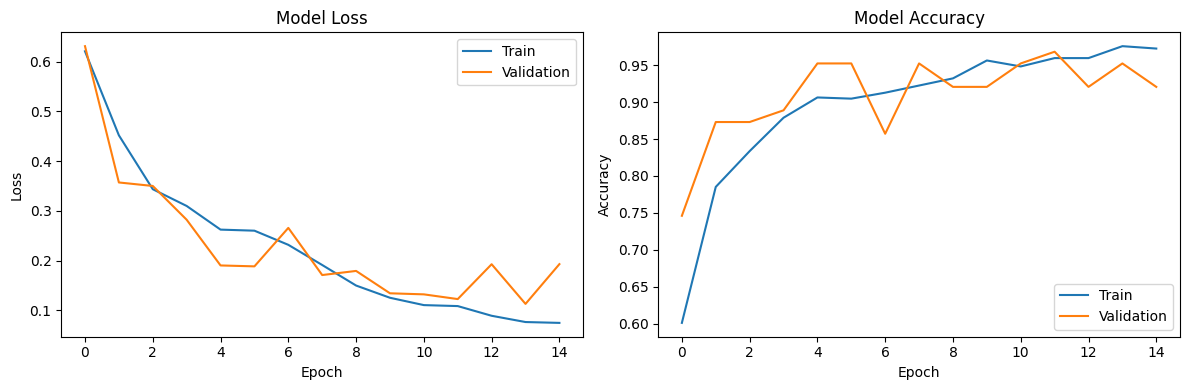

In [ ]:
#  Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test)

2/2 [==============================] - 1s 164ms/step


In [ ]:
y_pred = np.argmax(y_pred_prob, axis=1)

In [ ]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.9516129032258065

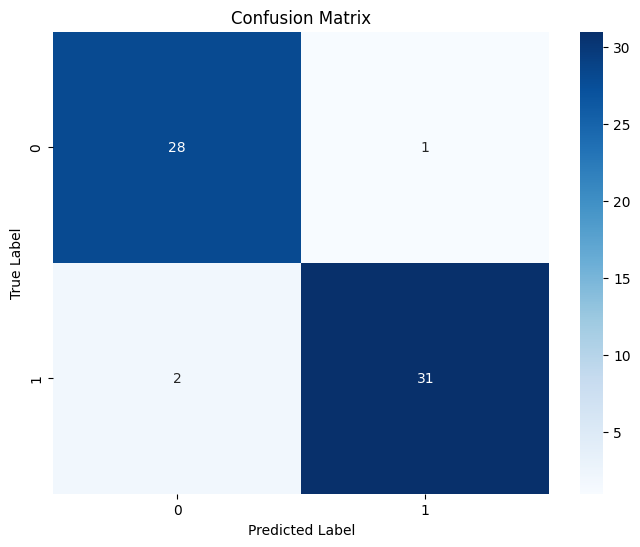

In [ ]:
# Plot confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.97      0.94      0.95        33

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62



In [ ]:
y_scores = y_pred_prob[:, 1]  # Assuming binary classification, use probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

thresholds

array([1.9999995e+00, 9.9999958e-01, 9.6081668e-01, 9.5026577e-01,
       3.0940726e-01, 1.4668942e-04], dtype=float32)

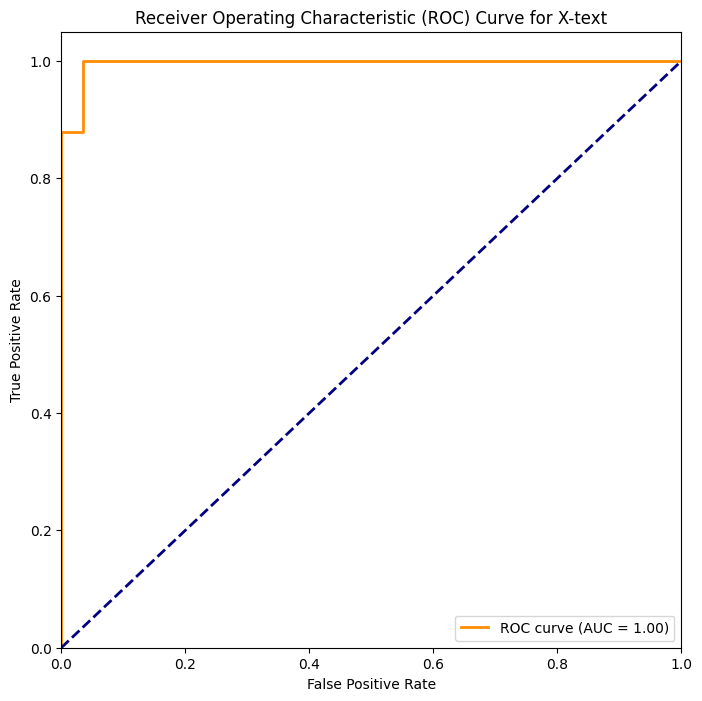

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for X-text')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_prob_val = model.predict(X_val)

2/2 [==============================] - 0s 128ms/step


In [ ]:
y_pred_val = np.argmax(y_pred_prob_val, axis=1)
accuracy = np.mean(y_pred_val == y_val)
accuracy

0.9206349206349206

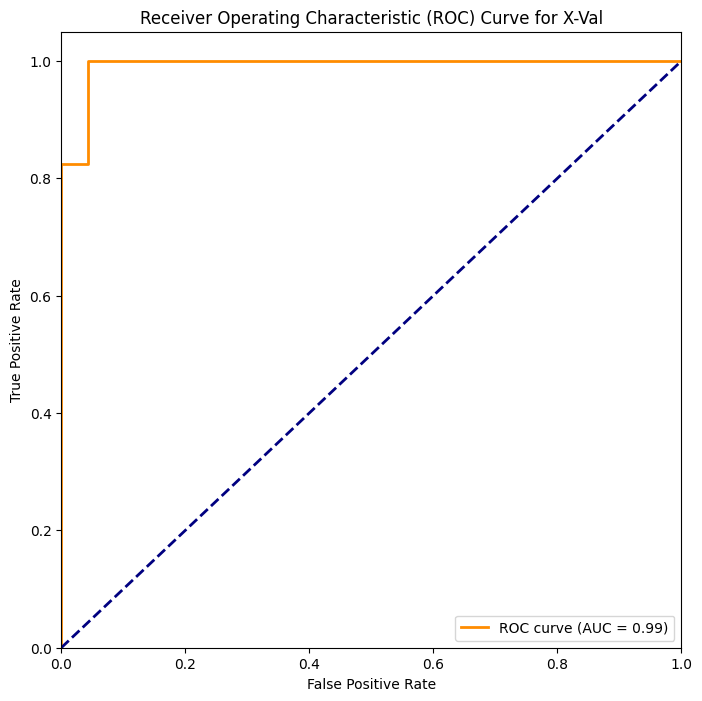

In [ ]:
y_scores_val = y_pred_prob_val[:, 1]  # A binary classification, use probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_scores_val)
roc_auc = auc(fpr, tpr)

# thresholds
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for X-Val')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from tensorflow.keras.models import load_model

# model.save("/content/drive/MyDrive/1_model_task_opencode/model.h5")

In [ ]:
#ROC AUC score for X_test
a=roc_auc_score(y_test,y_scores_val)
a

0.9524555903866249

##NOW WE ARE GOING OT PERFORM TRANSFER LEARNING##


In [ ]:
#Import any library here only.

from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Flatten

Task #4
Finetuning a pre-trained model and then train it

Aim to increase accuracy and AUC score

In [ ]:
# Use any pretrained model resnet/EfficientNet/VGG etc. and finetune them.
#Perform all task in task3.


In [ ]:

batch = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData",
    validation_split=0.1,
    subset="training",
    seed=69,
    label_mode='categorical',
    image_size=(100,100),
    batch_size=batch
)

Found 624 files belonging to 2 classes.
Using 562 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData",
    validation_split=0.1,
    subset="validation",
    seed=69,
    label_mode='categorical',
    image_size=(100,100),
    batch_size=batch
)

Found 624 files belonging to 2 classes.
Using 62 files for validation.


In [ ]:
test_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Opencode/Medical-Image-Classification/OpenCodeData/OpenCodeData",
    validation_split=0.1,
    subset="validation",
    seed=1337,
    image_size=(100,100),
    batch_size=batch,
    label_mode='categorical'
)

Found 624 files belonging to 2 classes.
Using 62 files for validation.


In [ ]:
train_ds.class_names


['INFECTED', 'NORMAL']

In [ ]:
resnet_model=tf.keras.Sequential()

In [ ]:
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(100,100,3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)

# pretrained_model.summary()
# Set all layers to be non-trainable
for layer in pretrained_model.layers:
    layer.trainable = False

# Set the last convolutional layer to be trainable
# pretrained_model.get_layer('conv5_block3_3_conv').trainable = True

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128,activation='relu'))
resnet_model.add(Dense(32,activation='relu'))
resnet_model.add(Dense(2,activation='softmax'))

**Training the model**

In [ ]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               262272    
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 23,854,178
Trainable params: 266,466
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
resnet_model.compile(optimizer=adam_optimizer,loss='binary_crossentropy',
                     metrics=['accuracy','AUC'])

In [ ]:
epochs=10
history_resnet = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
9/9 [==============================] - 40s 4s/step - loss: 0.8422 - accuracy: 0.5694 - auc: 0.6195 - val_loss: 0.4805 - val_accuracy: 0.8387 - val_auc: 0.9625
Epoch 2/10
9/9 [==============================] - 33s 3s/step - loss: 0.4078 - accuracy: 0.8541 - auc: 0.9384 - val_loss: 0.3410 - val_accuracy: 0.8548 - val_auc: 0.9577
Epoch 3/10
9/9 [==============================] - 33s 3s/step - loss: 0.3100 - accuracy: 0.8808 - auc: 0.9547 - val_loss: 0.2356 - val_accuracy: 0.9194 - val_auc: 0.9919
Epoch 4/10
9/9 [==============================] - 35s 3s/step - loss: 0.2636 - accuracy: 0.8950 - auc: 0.9617 - val_loss: 0.2248 - val_accuracy: 0.9516 - val_auc: 0.9847
Epoch 5/10
9/9 [==============================] - 35s 3s/step - loss: 0.2380 - accuracy: 0.9039 - auc: 0.9707 - val_loss: 0.1995 - val_accuracy: 0.9194 - val_auc: 0.9867
Epoch 6/10
9/9 [==============================] - 33s 3s/step - loss: 0.2133 - accuracy: 0.9093 - auc: 0.9738 - val_loss: 0.1879 - val_accuracy: 0.919

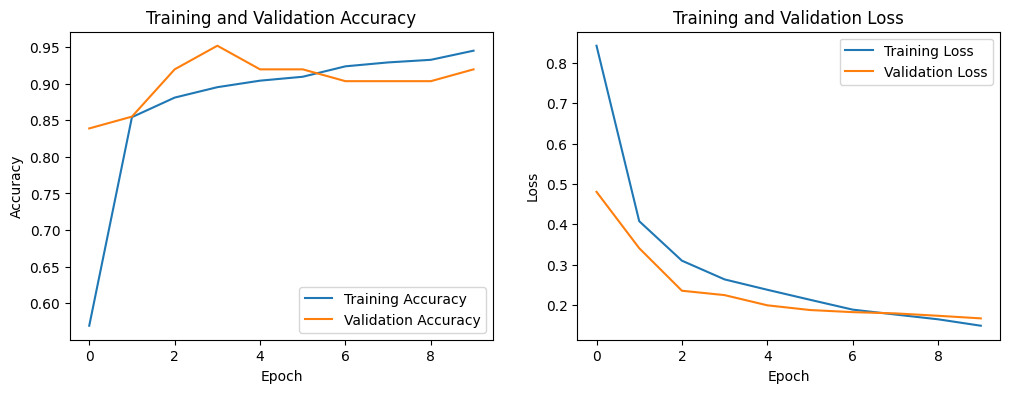

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

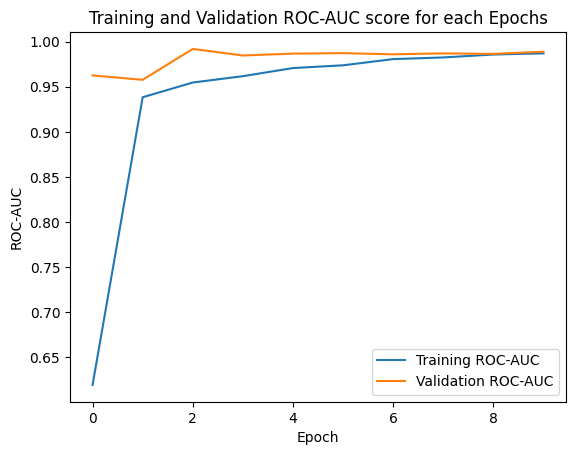

In [ ]:
# Plot ROC-AUC
plt.plot(history_resnet.history['auc'], label='Training ROC-AUC')
plt.plot(history_resnet.history['val_auc'], label='Validation ROC-AUC')
# plt.axhline(y=roc_auc_train, color='r', linestyle='--', label=f'Training ROC-AUC: {roc_auc_train:.4f}')
# plt.axhline(y=roc_auc_val, color='g', linestyle='--', label=f'Validation ROC-AUC: {roc_auc_val:.4f}')
plt.xlabel('Epoch')
plt.ylabel('ROC-AUC')
plt.title('Training and Validation ROC-AUC score for each Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred = resnet_model.predict(val_ds)

1/1 [==============================] - 7s 7s/step


In [ ]:
y_pred = [[float(x[0]),float(x[1])] for x in y_pred]

In [ ]:
resnet_model.save("/content/drive/MyDrive/1_model_task_opencode/model_resnet50.h5")

In [ ]:
resnet_model.evaluate(test_dataset)

1/1 [==============================] - 3s 3s/step - loss: 0.1678 - accuracy: 0.9516 - auc: 0.9914


[0.1677829474210739, 0.9516128897666931, 0.99141526222229]